In [1]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd  # to store tabular data
import numpy as np  # to do some math
import matplotlib.pyplot as plt  # a popular data visualization tool
import seaborn as sns  # another popular data visualization tool
%matplotlib inline  
plt.style.use('fivethirtyeight')  # a popular data visualization theme

# Salary Ranges Dataset:

In [2]:
# load in the data set
salary_ranges = pd.read_csv('../data/Salary_Ranges_by_Job_Classification.csv')

In [3]:
# view the first few rows and the headers
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [4]:
# get a sense of how many rows of data there are, if there are any missing values, and what data type each column has
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null object
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [5]:
# another method to check for missing values
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [6]:
# Basic Value Counts of the Grade column
salary_ranges['Grade'].value_counts().head()

00000    61
07450    12
07170     9
06870     9
07420     9
Name: Grade, dtype: int64

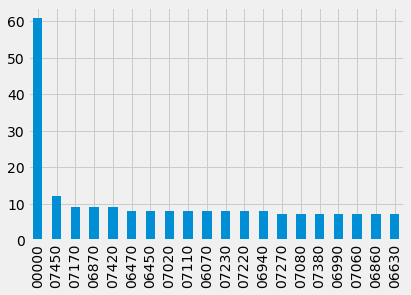

In [7]:
# Bar Chart of the Grade column
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

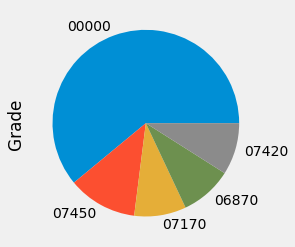

In [8]:
# Bar Chart of the Grade column as a pie chart (top 5 values only)
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

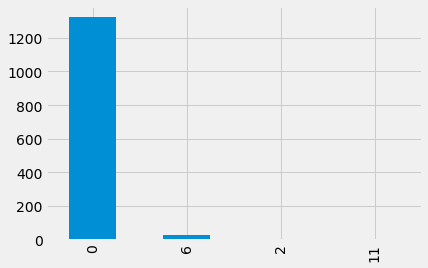

In [9]:
salary_ranges['Extended Step'].value_counts().plot(kind='bar')

In [10]:
# show descriptive stats:
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [11]:
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]

salary_ranges.head(5)

,Biweekly High Rate,Grade
0,$0.00,00000
1,$15.00,00000
2,$25.00,00000
3,$50.00,00000
4,$100.00,00000


In [12]:
# Rate has dollar signs in a few of them, we need to clean that up..
salary_ranges['Biweekly High Rate'].describe()

count         1356
unique         593
top       $3460.00
freq            12
Name: Biweekly High Rate, dtype: object

In [13]:
# need to clean our Biweekly High columns to remove the dollar sign in order to visualize
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].map(lambda value: value.replace('$',''))

In [14]:
# Check to see the '$' has been removed
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.00,00000
1,15.00,00000
2,25.00,00000
3,50.00,00000
4,100.00,00000


In [15]:
# Convert the Biweeky columns to float
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)

In [16]:
# Convert the Grade columns to str
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)

In [17]:
# check to see if converting the data types worked
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
Biweekly High Rate    1356 non-null float64
Grade                 1356 non-null object
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


In [18]:
salary_ranges.describe()

,Biweekly High Rate
count,1356.000000
mean,3161.727021
std,1481.002904
min,0.000000
25%,2145.000000
50%,2856.500000
75%,3703.000000
max,12120.770000


In [23]:
# Which Grade has the highest Biweekly high rate
# What is the average rate across all of the Grades

In [24]:
# Highest Salary
salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

Text(0.5, 1, 'Top 20 Grade by Mean Biweekly High Rate')

Text(0.5, 1.0, 'Top 20 Grade by Mean Biweekly High Rate')

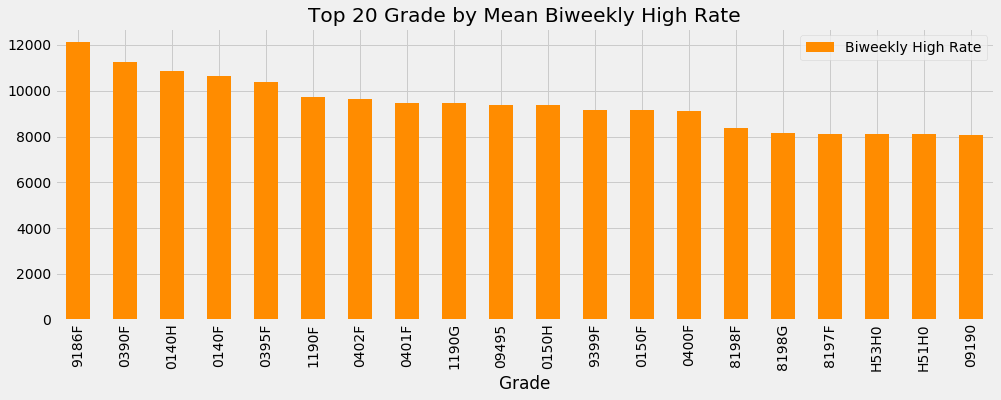

In [25]:
# Which Grade has the highest Biweekly high rate
# What is the average rate across all of the Grades

fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

Text(0.5, 1.0, 'Bottom 20 Grade by Mean Biweekly High Rate')

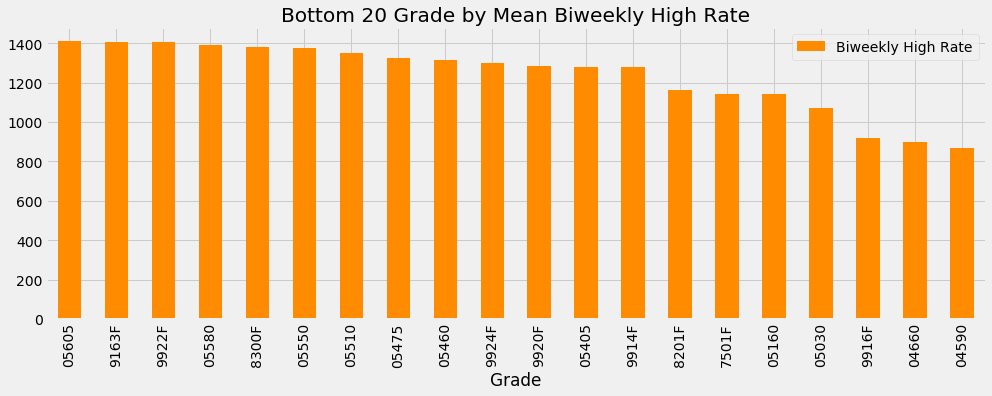

In [26]:
# Which Grade has the lowest Biweekly high rate

fig = plt.figure(figsize=(15,5))
ax = fig.gca()

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False).tail(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Bottom 20 Grade by Mean Biweekly High Rate')

In [22]:
sorted_df = salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values(
    'Biweekly High Rate', ascending=False)
sorted_df.iloc[0][0] / sorted_df.iloc[-1][0]

13.931919540229886